In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,LabelEncoder, OneHotEncoder

In [5]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
print(df.isnull().sum())
print(df.duplicated().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
1


<Axes: xlabel='total_bill', ylabel='Count'>

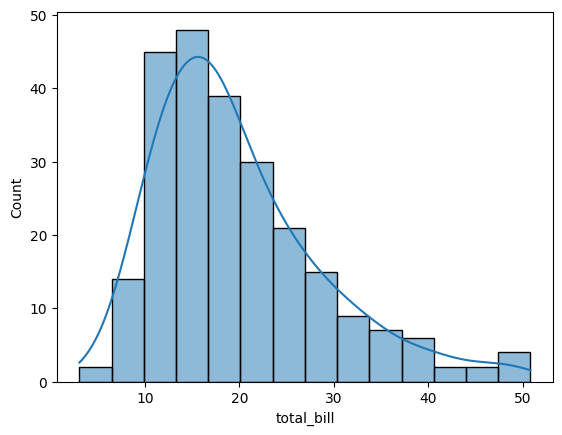

In [10]:
sns.histplot(df["total_bill"],kde=True,label="total_bill")

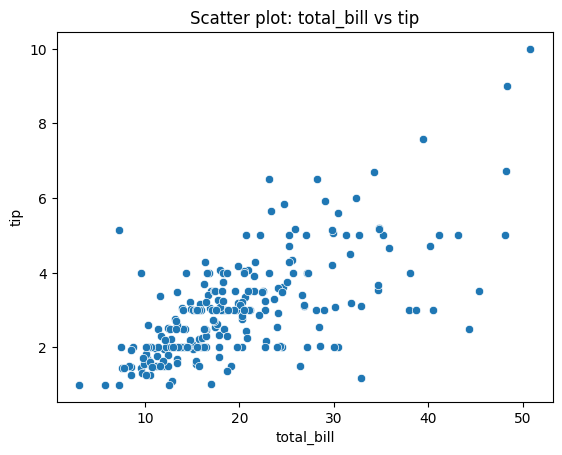

In [11]:
sns.scatterplot(x=df["total_bill"], y=df["tip"])
plt.title("Scatter plot: total_bill vs tip")
plt.show()

<Axes: xlabel='tip', ylabel='Count'>

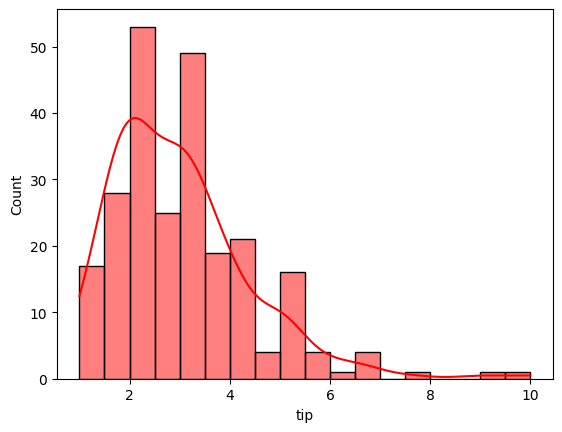

In [12]:
sns.histplot(df["tip"], kde=True, color='red', label='tip')


In [14]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [16]:
categorical = df.select_dtypes(include=['object','category']).columns
numerical = df.select_dtypes(include=['int64','float64']).columns
print(f"Categorial: {categorical}\nNumerical: {numerical}")

Categorial: Index(['sex', 'smoker', 'day', 'time'], dtype='object')
Numerical: Index(['total_bill', 'tip', 'size'], dtype='object')


array([[<Axes: title={'center': 'total_bill'}>,
        <Axes: title={'center': 'tip'}>],
       [<Axes: title={'center': 'size'}>, <Axes: >]], dtype=object)

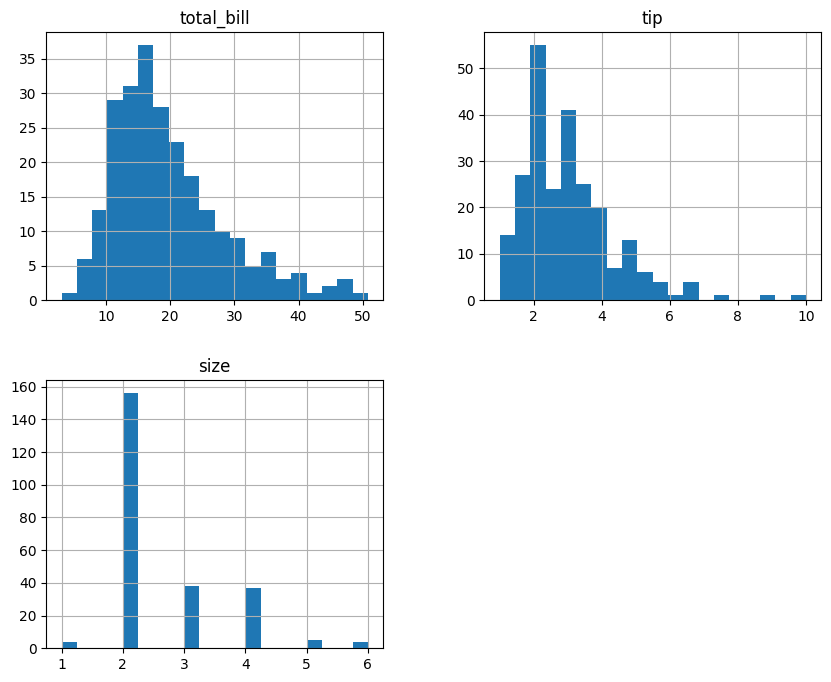

In [18]:
df[numerical].hist(figsize=(10,8),bins=20)

sex
Male      157
Female     87
Name: count, dtype: int64
smoker
No     151
Yes     93
Name: count, dtype: int64
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
time
Dinner    176
Lunch      68
Name: count, dtype: int64


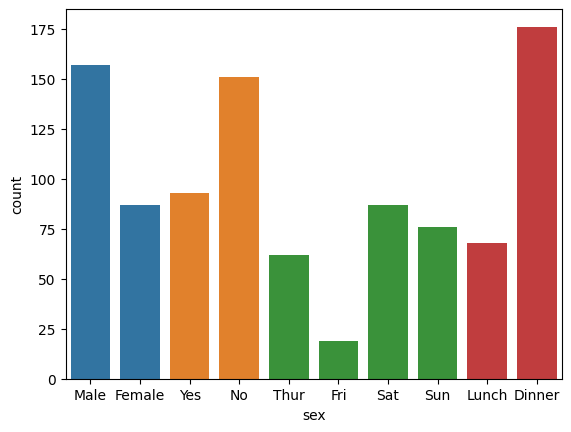

In [19]:
for col in categorical:
  print(df[col].value_counts())
  sns.countplot(x=col,data=df)

<Axes: >

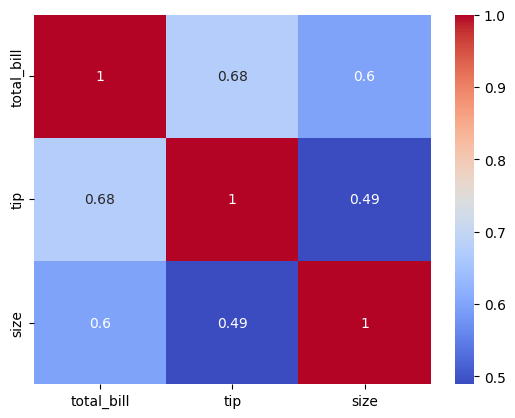

In [23]:
sns.heatmap(df[numerical].corr(),annot=True,cmap="coolwarm")

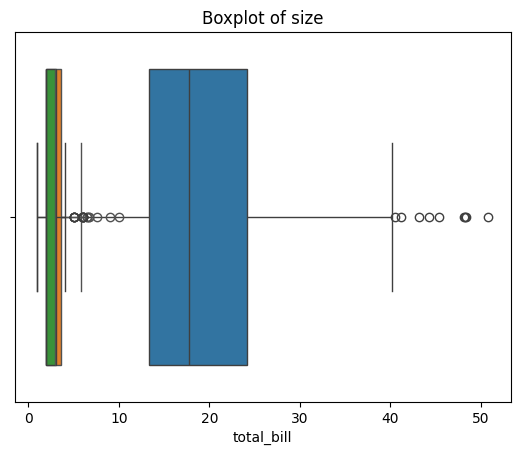

In [24]:
for col in numerical:
  sns.boxplot(x=df[col])
  plt.title(f"Boxplot of {col}")

In [38]:
unique_values=[]

for col in categorical:
  uni_col = df[col].unique()
  unique_values.append(uni_col)
  print(f"Unique values in {col}: {uni_col}")



Unique values in sex: ['Female', 'Male']
Categories (2, object): ['Male', 'Female']
Unique values in smoker: ['No', 'Yes']
Categories (2, object): ['Yes', 'No']
Unique values in day: ['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']
Unique values in time: ['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']


In [40]:
categorical = ['sex', 'smoker', 'day', 'time']  # example

hot_en = []
label_en = []

for col in categorical:
    if df[col].nunique() == 2:
        label_en.append(col)
    else:
        hot_en.append(col)

print("LabelEncoder columns:", label_en)
print("OneHotEncoder columns:", hot_en)
print("Uniques: ",unique_values)
print("Length of col",len(categorical))

LabelEncoder columns: ['sex', 'smoker', 'time']
OneHotEncoder columns: ['day']
Uniques:  [['Female', 'Male']
Categories (2, object): ['Male', 'Female'], ['No', 'Yes']
Categories (2, object): ['Yes', 'No'], ['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun'], ['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']]
Length of col 4


In [45]:
le = LabelEncoder()
for col in label_en:
  df[col] = le.fit_transform(df[col])

In [49]:
ohe = OneHotEncoder(sparse_output=False, drop='first')

In [50]:
ohe_array = ohe.fit_transform(df[hot_en])

In [51]:
ohe_df = pd.DataFrame(ohe_array,columns=ohe.get_feature_names_out(hot_en),index=df.index)

In [52]:
df = df.drop(columns=hot_en)
df = pd.concat([df, ohe_df], axis=1)

In [53]:
df.head()

,total_bill,tip,sex,smoker,time,size,day_Sat,day_Sun,day_Thur
0,16.99,1.01,0,0,0,2,0.0,1.0,0.0
1,10.34,1.66,1,0,0,3,0.0,1.0,0.0
2,21.01,3.50,1,0,0,3,0.0,1.0,0.0
3,23.68,3.31,1,0,0,2,0.0,1.0,0.0
4,24.59,3.61,0,0,0,4,0.0,1.0,0.0


In [54]:
scaler = MinMaxScaler()

In [55]:
df[numerical] = scaler.fit_transform(df[numerical])

In [56]:
df.head()

,total_bill,tip,sex,smoker,time,size,day_Sat,day_Sun,day_Thur
0,0.291579,0.001111,0,0,0,0.2,0.0,1.0,0.0
1,0.152283,0.073333,1,0,0,0.4,0.0,1.0,0.0
2,0.375786,0.277778,1,0,0,0.4,0.0,1.0,0.0
3,0.431713,0.256667,1,0,0,0.2,0.0,1.0,0.0
4,0.450775,0.290000,0,0,0,0.6,0.0,1.0,0.0
